# Проект 2. Разведывательный анализ данных

## Цель проекта
* Установить влияние условий жизни учащихся на их успеваемость по математике

## Задачи проекта
* Подготовить данные для анализа
* Выполнить анализ данных
* Определить параметры модели, предсказывающей результаты экзамена по математике

### Первичный осмотр данных

Рассмотрим какие данные содержатся в файле

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import math

students = pd.read_csv('stud_math.csv')

display(students.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Посмотрим на типы данных

In [77]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Таким образов в нашем датасете содержится
* 395 строк
* 30 столбцов, из которых:
    * 13 числовых
    * 17 строковых

### Первичный анализ данных в столбцах

Для удобства в дальнейшей работе с датасетом, переименуем столбцы, приведя их имена к единому стандарту:

In [78]:
students.columns = [
    'school',
    'sex',
    'age',
    'address_type',
    'family_size',
    'parents_status',
    'mother_edu',
    'father_edu',
    'mother_job',
    'father_job',
    'reason',
    'guardian',
    'traveltime',
    'studytime',
    'failures',
    'schoolsup',
    'family_support',
    'paid',
    'activities',
    'nursery',
    'studytime_granular',
    'higher_edu',
    'internet',
    'romantic',
    'family_rel',
    'freetime',
    'go_out',
    'health',
    'absences',
    'score'
]

Рассмотрим все столбцы по отдельности

#### School

Выясним сколько различных школ содержится в датасете:

,school
GP,349
MS,46


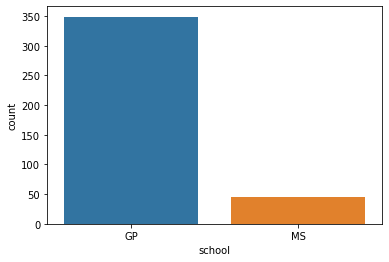

In [79]:
display(pd.DataFrame(students.school.value_counts()))
display(sns.countplot(x='school', data=students))

Всего 2 школы. Пустые значения отсутствуют. Данную колонку будем считать подготовленной для анализа и пойдем дальше.

#### Sex
Посмотрим на соотношение полов среди учеников.

In [80]:
pd.DataFrame(students.sex.value_counts())

,sex
F,208
M,187


Видим, что пустые и некорректные данных отсутствуют. В представленном наборе данных парней несколько больше, чем девушек.
Переходим к следуюущему столбцу.

#### Age
Посмотрим на распределение возраста учеников в датасете.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

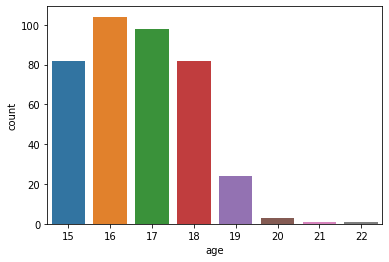

In [81]:
display(students.age.describe())
display(students.age.value_counts())
sns.countplot(x='age', data=students)

Основная масса учеников находится в возрасте 15-18 лет.
Пустые значения отсутствуют и все данные расположены в рамках оговоренных условиями проекта - от 15 до 22 лет.
Идем дальше

#### Address type
Посмотрим какая часть учащихся живет в городе, а какая за городом

Проверим емеются ли у нас пропущенные значения:

In [82]:
students.address_type = students.address_type.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.address_type.value_counts()))

,address_type
U,295
R,83
nan,17


Как видим, у нас присутствуют неопределенные значения типа адреса студентов.
Давайте определим их, исходя из времени, которое ученик тратит на дорогу до школы.
Примем, что ученики, живущие в городе тратят на дорогу до школы менее 15 минут. Если значение времени на дорогу не указано, заменяем пустое значение на моду.

In [83]:
def address_type_hadler(row, most_frequent_value):
    if str(row.address_type) == 'nan':
        if math.isnan(row.traveltime):
            return most_frequent_value
        else:
            if int(row.traveltime) > 1:
                return 'R'
            else:
                return 'U'
    else:
        return row.address_type
 
students.address_type = students.apply(address_type_hadler, axis=1, args=(students.address_type.value_counts().idxmax()))
display(pd.DataFrame(students.address_type.value_counts()))

,address_type
U,306
R,89


Теперь незаполненных значений нет. Большая часть учеников проживает в городе.

#### Traevel time
Проанализируем время, которое тратит ученик на дорогу до школы

Проверяем имеются ли у нас пропущенные значения:

In [84]:
students.traveltime = students.traveltime.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(students.traveltime.value_counts()))

,traveltime
1.0,242
2.0,96
0.0,28
3.0,22
4.0,7


Непределенные значение присутствуют.
Присвоим им значение исходя из адреса ученика.
Примем значение 1.0 в случае, если ученик живет в городе и 2.0 - если за городом

,traveltime
1.0,263
2.0,103
3.0,22
4.0,7


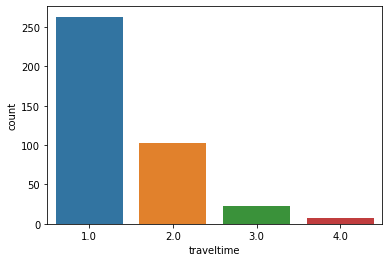

In [85]:
def traveltime_hadler(row):
    if (row.traveltime) == 0.0:        
        if row.address_type == 'U':
            return 1.0
        else:
            return 2.0
    else:
        return row.traveltime
    
students.traveltime = students.apply(traveltime_hadler, axis=1)
display(pd.DataFrame(students.traveltime.value_counts()))
sns.countplot(x='traveltime', data=students)

Как видим, большая часть учащихся тратит меньше 15 минут на дорогу. Но есть и такие, у кого уходит более часа на то, чтобы добраться до школы.

#### Family size
Рссмотрим распределение студентов по размеру семьи

In [86]:
students.family_size = students.family_size.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.family_size.value_counts()))

,family_size
GT3,261
LE3,107
nan,27


У нас имеются незаполненные значения.
Для определения значения размера семьи посмотрим на данные статуса совместного проживания родителей.

#### Parents status
Статус совместного жилья родителей

In [87]:
students.parents_status = students.parents_status.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.parents_status.value_counts()))

,parents_status
T,314
nan,45
A,36


Тут также имеются пропуски значений. Займемся ими чуть позже, после обработки пропущенных значений для Family size.
Примем, что если родители проживают совместно, то размер семьи больше 3-х человек, если раздельно - то меньше или равно 3.
Если значение статуса жилья родителей не задано, то примемен значение моды.

In [88]:
def family_size_handler(row):
    if row.family_size == 'nan':
        if row.parents_status == 'nan':
            return 'GT3'
        else:
            if row.parents_status == 'T':
                return 'GT3'
            else:
                return 'LE3'
    else:
        return row.family_size


students.family_size = students.apply(family_size_handler, axis=1)
display(pd.DataFrame(students.family_size.value_counts()))

,family_size
GT3,285
LE3,110


In [89]:
def parents_status_handler(row):
    if row.parents_status == 'nan':
        if row.family_size == 'nan':
            return 'T'
        else:
            if row.family_size == 'GT3':
                return 'T'
            else:
                return 'A'
    else:
        return row.parents_status


students.parents_status = students.apply(parents_status_handler, axis=1)
display(pd.DataFrame(students.parents_status.value_counts()))

,parents_status
T,346
A,49


#### Mother education
Образование матери

In [90]:
students.mother_edu = students.mother_edu.apply(lambda x: 9.0 if math.isnan(x) else x)
display(pd.DataFrame(students.mother_edu.value_counts()))

,mother_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
9.0,3


,mother_edu
4.0,134
2.0,102
3.0,97
1.0,59
0.0,3


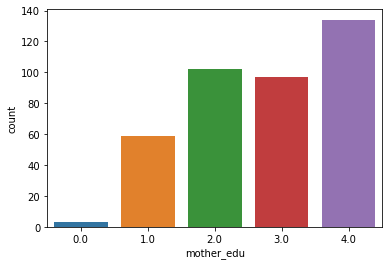

In [91]:
mfv = students.mother_edu.value_counts().idxmax()
students.mother_edu = students.mother_edu.apply(lambda x: mfv if x==9.0 else x)
display(pd.DataFrame(students.mother_edu.value_counts()))
sns.countplot(x='mother_edu', data=students)

#### Father education
Образование отца

In [92]:
students.father_edu = students.father_edu.apply(lambda x: 9.0 if math.isnan(x) else x)
display(pd.DataFrame(students.father_edu.value_counts()))

,father_edu
2.0,106
3.0,96
4.0,88
1.0,78
9.0,24
0.0,2
40.0,1


,father_edu
3.0,121
2.0,106
4.0,88
1.0,78
0.0,2


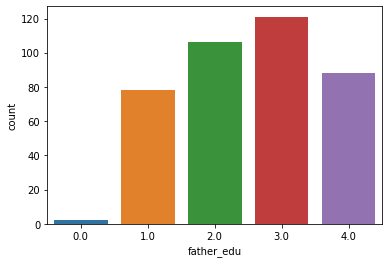

In [93]:
median = students.father_edu.median()
students.father_edu = students.father_edu.apply(lambda x: median if x>4.0 else x)
display(pd.DataFrame(students.father_edu.value_counts()))
sns.countplot(x='father_edu', data=students)

#### Mother job
Работа матери

In [94]:
students.mother_job = students.mother_job.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.mother_job.value_counts()))

,mother_job
other,133
services,98
at_home,58
teacher,55
health,32
nan,19


,mother_job
other,133
services,102
teacher,61
at_home,60
health,39


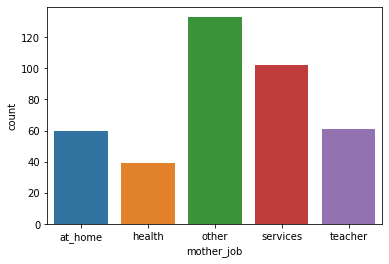

In [95]:
def mother_job_handler(row):
    if row.mother_job == 'nan':
        if row.mother_edu == 'nan':
            return 'other'
        elif row.mother_edu == 4.0:
                return 'health'
        elif row.mother_edu == 3.0:
            return 'teacher'
        elif row.mother_edu == 2.0:
            return 'services'        
        else:
            return 'at_home'
    else:
        return row.mother_job

students.mother_job = students.apply(mother_job_handler, axis=1)
display(pd.DataFrame(students.mother_job.value_counts()))
sns.countplot(x='mother_job', data=students)

#### Father job
Работа отца

In [96]:
students.father_job = students.father_job.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.father_job.value_counts()))

,father_job
other,197
services,102
nan,36
teacher,29
at_home,16
health,15


,father_job
other,197
services,116
teacher,38
at_home,23
health,21


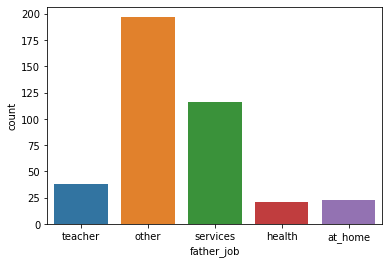

In [97]:
def father_job_handler(row):
    if row.father_job == 'nan':
        if row.father_edu == 'nan':
            return 'other'
        elif row.father_edu == 4.0:
                return 'health'
        elif row.father_edu == 3.0:
            return 'teacher'
        elif row.father_edu == 2.0:
            return 'services'        
        else:
            return 'at_home'
    else:
        return row.father_job

students.father_job = students.apply(father_job_handler, axis=1)
display(pd.DataFrame(students.father_job.value_counts()))
sns.countplot(x='father_job', data=students)

#### Reason
Причина выбора школы

In [98]:
students.reason = students.reason.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.reason.value_counts()))

,reason
course,137
home,104
reputation,103
other,34
nan,17


,reason
course,139
home,119
reputation,103
other,34


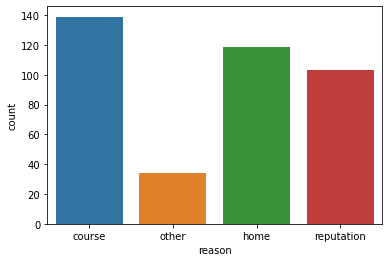

In [99]:
def reason_handler(row):
    if row.reason == 'nan':
        if row.traveltime == 1.0:
            return 'home'
        else:
            return 'course'
    else:
        return row.reason
    
students.reason = students.apply(reason_handler, axis=1)
display(pd.DataFrame(students.reason.value_counts()))
sns.countplot(x='reason', data=students)

#### Guardian
Опекун

In [100]:
students.guardian = students.guardian.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.guardian.value_counts()))

,guardian
mother,250
father,86
nan,31
other,28


,guardian
mother,281
father,86
other,28


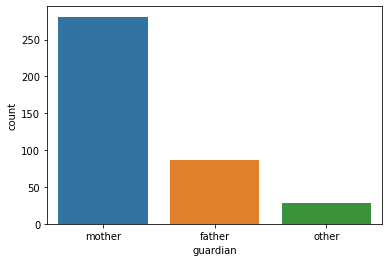

In [101]:
mfv = students.guardian.value_counts().idxmax()
students.guardian = students.guardian.apply(lambda x: mfv if x=='nan' else x)
display(pd.DataFrame(students.guardian.value_counts()))
sns.countplot(x='guardian', data=students)

#### Studytime
Время на учёбу помимо школы

In [102]:
students.studytime = students.studytime.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(students.studytime.value_counts()))

,studytime
2.0,194
1.0,103
3.0,64
4.0,27
0.0,7


,studytime
2.0,201
1.0,103
3.0,64
4.0,27


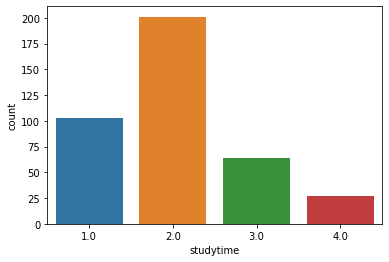

In [103]:
median = students.studytime.median()
students.studytime = students.studytime.apply(lambda x: median if x==0.0 else x)
display(pd.DataFrame(students.studytime.value_counts()))
sns.countplot(x='studytime', data=students)

#### Failures
Количество внеучебных неудач

In [104]:
students.failures = students.failures.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(students.failures.value_counts()))

,failures
0.0,315
1.0,49
2.0,16
3.0,15


#### Schoolsup
Дополнительная образовательная поддержка

In [105]:
students.schoolsup = students.schoolsup.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.schoolsup.value_counts()))

,schoolsup
no,335
yes,51
nan,9


In [106]:
mfv = students.schoolsup.value_counts().idxmax()
students.schoolsup = students.schoolsup.apply(lambda x: mfv if x=='nan' else x)
display(pd.DataFrame(students.schoolsup.value_counts()))

,schoolsup
no,344
yes,51


#### Family support
Семейная образовательная поддержка

In [107]:
students.family_support = students.family_support.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.family_support.value_counts()))

,family_support
yes,219
no,137
nan,39


In [108]:
mfv = students.family_support.value_counts().idxmax()
students.family_support = students.family_support.apply(lambda x: mfv if x=='nan' else x)
display(pd.DataFrame(students.family_support.value_counts()))

,family_support
yes,258
no,137


#### Paid
Дополнительные платные занятия по математике

In [109]:
students.paid = students.paid.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.paid.value_counts()))

,paid
no,200
yes,155
nan,40


In [110]:
mfv = students.paid.value_counts().idxmax()
students.paid = students.paid.apply(lambda x: mfv if x=='nan' else x)
display(pd.DataFrame(students.paid.value_counts()))

,paid
no,240
yes,155


#### Activities
Дополнительные внеучебные занятия

In [111]:
students.activities = students.activities.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.activities.value_counts()))

,activities
yes,195
no,186
nan,14


In [112]:
mfv = students.activities.value_counts().idxmax()
students.activities = students.activities.apply(lambda x: mfv if x=='nan' else x)
display(pd.DataFrame(students.activities.value_counts()))

,activities
yes,209
no,186


#### Nursery
Посещал детский сад

In [113]:
students.nursery = students.nursery.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.nursery.value_counts()))

,nursery
yes,300
no,79
nan,16


In [114]:
mfv = students.nursery.value_counts().idxmax()
students.nursery = students.nursery.apply(lambda x: mfv if x=='nan' else x)
display(pd.DataFrame(students.nursery.value_counts()))

,nursery
yes,316
no,79


#### Higher edu
Хочет получить высшее образование

In [115]:
students.higher_edu = students.higher_edu.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.higher_edu.value_counts()))

,higher_edu
yes,356
nan,20
no,19


In [116]:
mfv = students.higher_edu.value_counts().idxmax()
students.higher_edu = students.higher_edu.apply(lambda x: mfv if x=='nan' else x)
display(pd.DataFrame(students.higher_edu.value_counts()))

,higher_edu
yes,376
no,19


#### Internet
Наличие интернета дома

In [117]:
students.internet = students.internet.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.internet.value_counts()))

,internet
yes,305
no,56
nan,34


In [118]:
mfv = students.internet.value_counts().idxmax()
students.internet = students.internet.apply(lambda x: mfv if x=='nan' else x)
display(pd.DataFrame(students.internet.value_counts()))

,internet
yes,339
no,56


#### Romantic
В романтических отношениях

In [119]:
students.romantic = students.romantic.astype(str).apply(lambda x: None if x.strip() == '' else x)
display(pd.DataFrame(students.romantic.value_counts()))

,romantic
no,240
yes,124
nan,31


In [120]:
mfv = students.romantic.value_counts().idxmax()
students.romantic = students.romantic.apply(lambda x: mfv if x=='nan' else x)
display(pd.DataFrame(students.romantic.value_counts()))

,romantic
no,271
yes,124


#### Family rel
Семейные отношения

In [121]:
students.family_rel = students.family_rel.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(students.family_rel.value_counts()))

,family_rel
4.0,182
5.0,99
3.0,62
0.0,27
2.0,17
1.0,7
-1.0,1


,family_rel
4.0,210
5.0,99
3.0,62
2.0,17
1.0,7


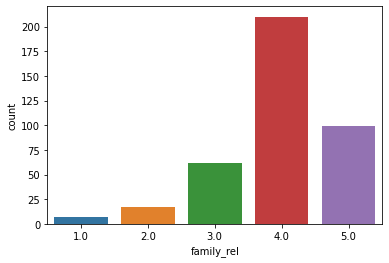

In [122]:
median = students.family_rel.median()
students.family_rel = students.family_rel.apply(lambda x: median if x<1.0 else x)
display(pd.DataFrame(students.family_rel.value_counts()))
sns.countplot(x='family_rel', data=students)

#### Freetime
Свободное время после школы

In [123]:
students.freetime = students.freetime.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(students.freetime.value_counts()))

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
0.0,11


,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


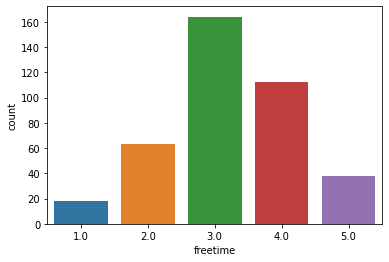

In [124]:
median = students.freetime.median()
students.freetime = students.freetime.apply(lambda x: median if x<1.0 else x)
display(pd.DataFrame(students.freetime.value_counts()))
sns.countplot(x='freetime', data=students)

#### Go out
Проведение времени с друзьями

In [125]:
students.go_out = students.go_out.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(students.go_out.value_counts()))

,go_out
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
0.0,8


,go_out
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


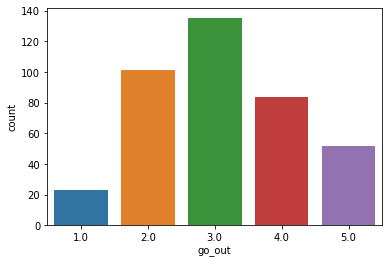

In [126]:
median = students.go_out.median()
students.go_out = students.go_out.apply(lambda x: median if x<1.0 else x)
display(pd.DataFrame(students.go_out.value_counts()))
sns.countplot(x='go_out', data=students)

#### Health
Текущее состояние здоровья

In [127]:
students.health = students.health.apply(lambda x: 0.0 if math.isnan(x) else x)
display(pd.DataFrame(students.health.value_counts()))

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
0.0,15


,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


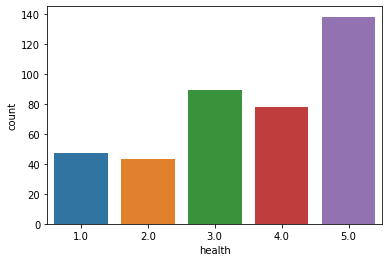

In [128]:
median = students.health.median()
students.health = students.health.apply(lambda x: median if x<1.0 else x)
display(pd.DataFrame(students.health.value_counts()))
sns.countplot(x='health', data=students)

#### Absences
Количество пропущенных занятий

In [129]:
display(students.absences.describe())

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

В столбце имеются пустые значения. Замених их на медианное значение

In [130]:
median = students.absences.median()
students.absences = students.absences.apply(lambda x: median if math.isnan(x) else x)

In [131]:
display(students.absences.describe())

count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Как видим, в выбрке присутствуют неоптимальные значения: принимая во внимание тот факт, что количество дней в году составляет 365, и из них, в среднем, порядка 200, учебных, количество пропусков не может быть равным 385, и может принять значение 212 только в случае, когда ученик совсем не посещал школу.
Поэтому, руководствуясь здравым смыслом, удалим из выборки строки, содержащие значения количества пропусков более 60, как неверно заданные.

In [132]:
students = students.loc[students.absences <= 60]
display(pd.DataFrame(students.absences.value_counts()))
display(students.absences.describe())

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


count    392.000000
mean       5.520408
std        7.166603
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       56.000000
Name: absences, dtype: float64

In [133]:
display(pd.DataFrame(students.score.value_counts()))
display(students.score.describe())

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,25
80.0,16


count    386.000000
mean      52.215026
std       22.941549
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Посколько данная колонка является ключевой в задаче анализа, оставим в датасете только те строки, в которых значение колонки score являются рациональными.
Удалим строки с незаполненными значениями этой колонки или со значением равным 0.

,score
50.0,54
55.0,46
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,25
80.0,16
30.0,15


count    349.000000
mean      57.750716
std       16.176053
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

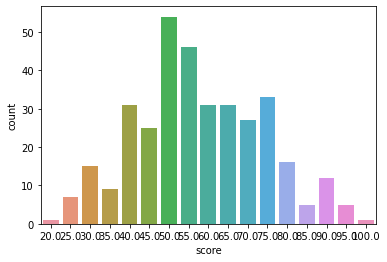

In [134]:
students.score = students.score.apply(lambda x: 0.0 if math.isnan(x) else x)
students = students.loc[students.score != 0.0]
display(pd.DataFrame(students.score.value_counts()))
display(students.score.describe())
sns.countplot(x='score', data=students)

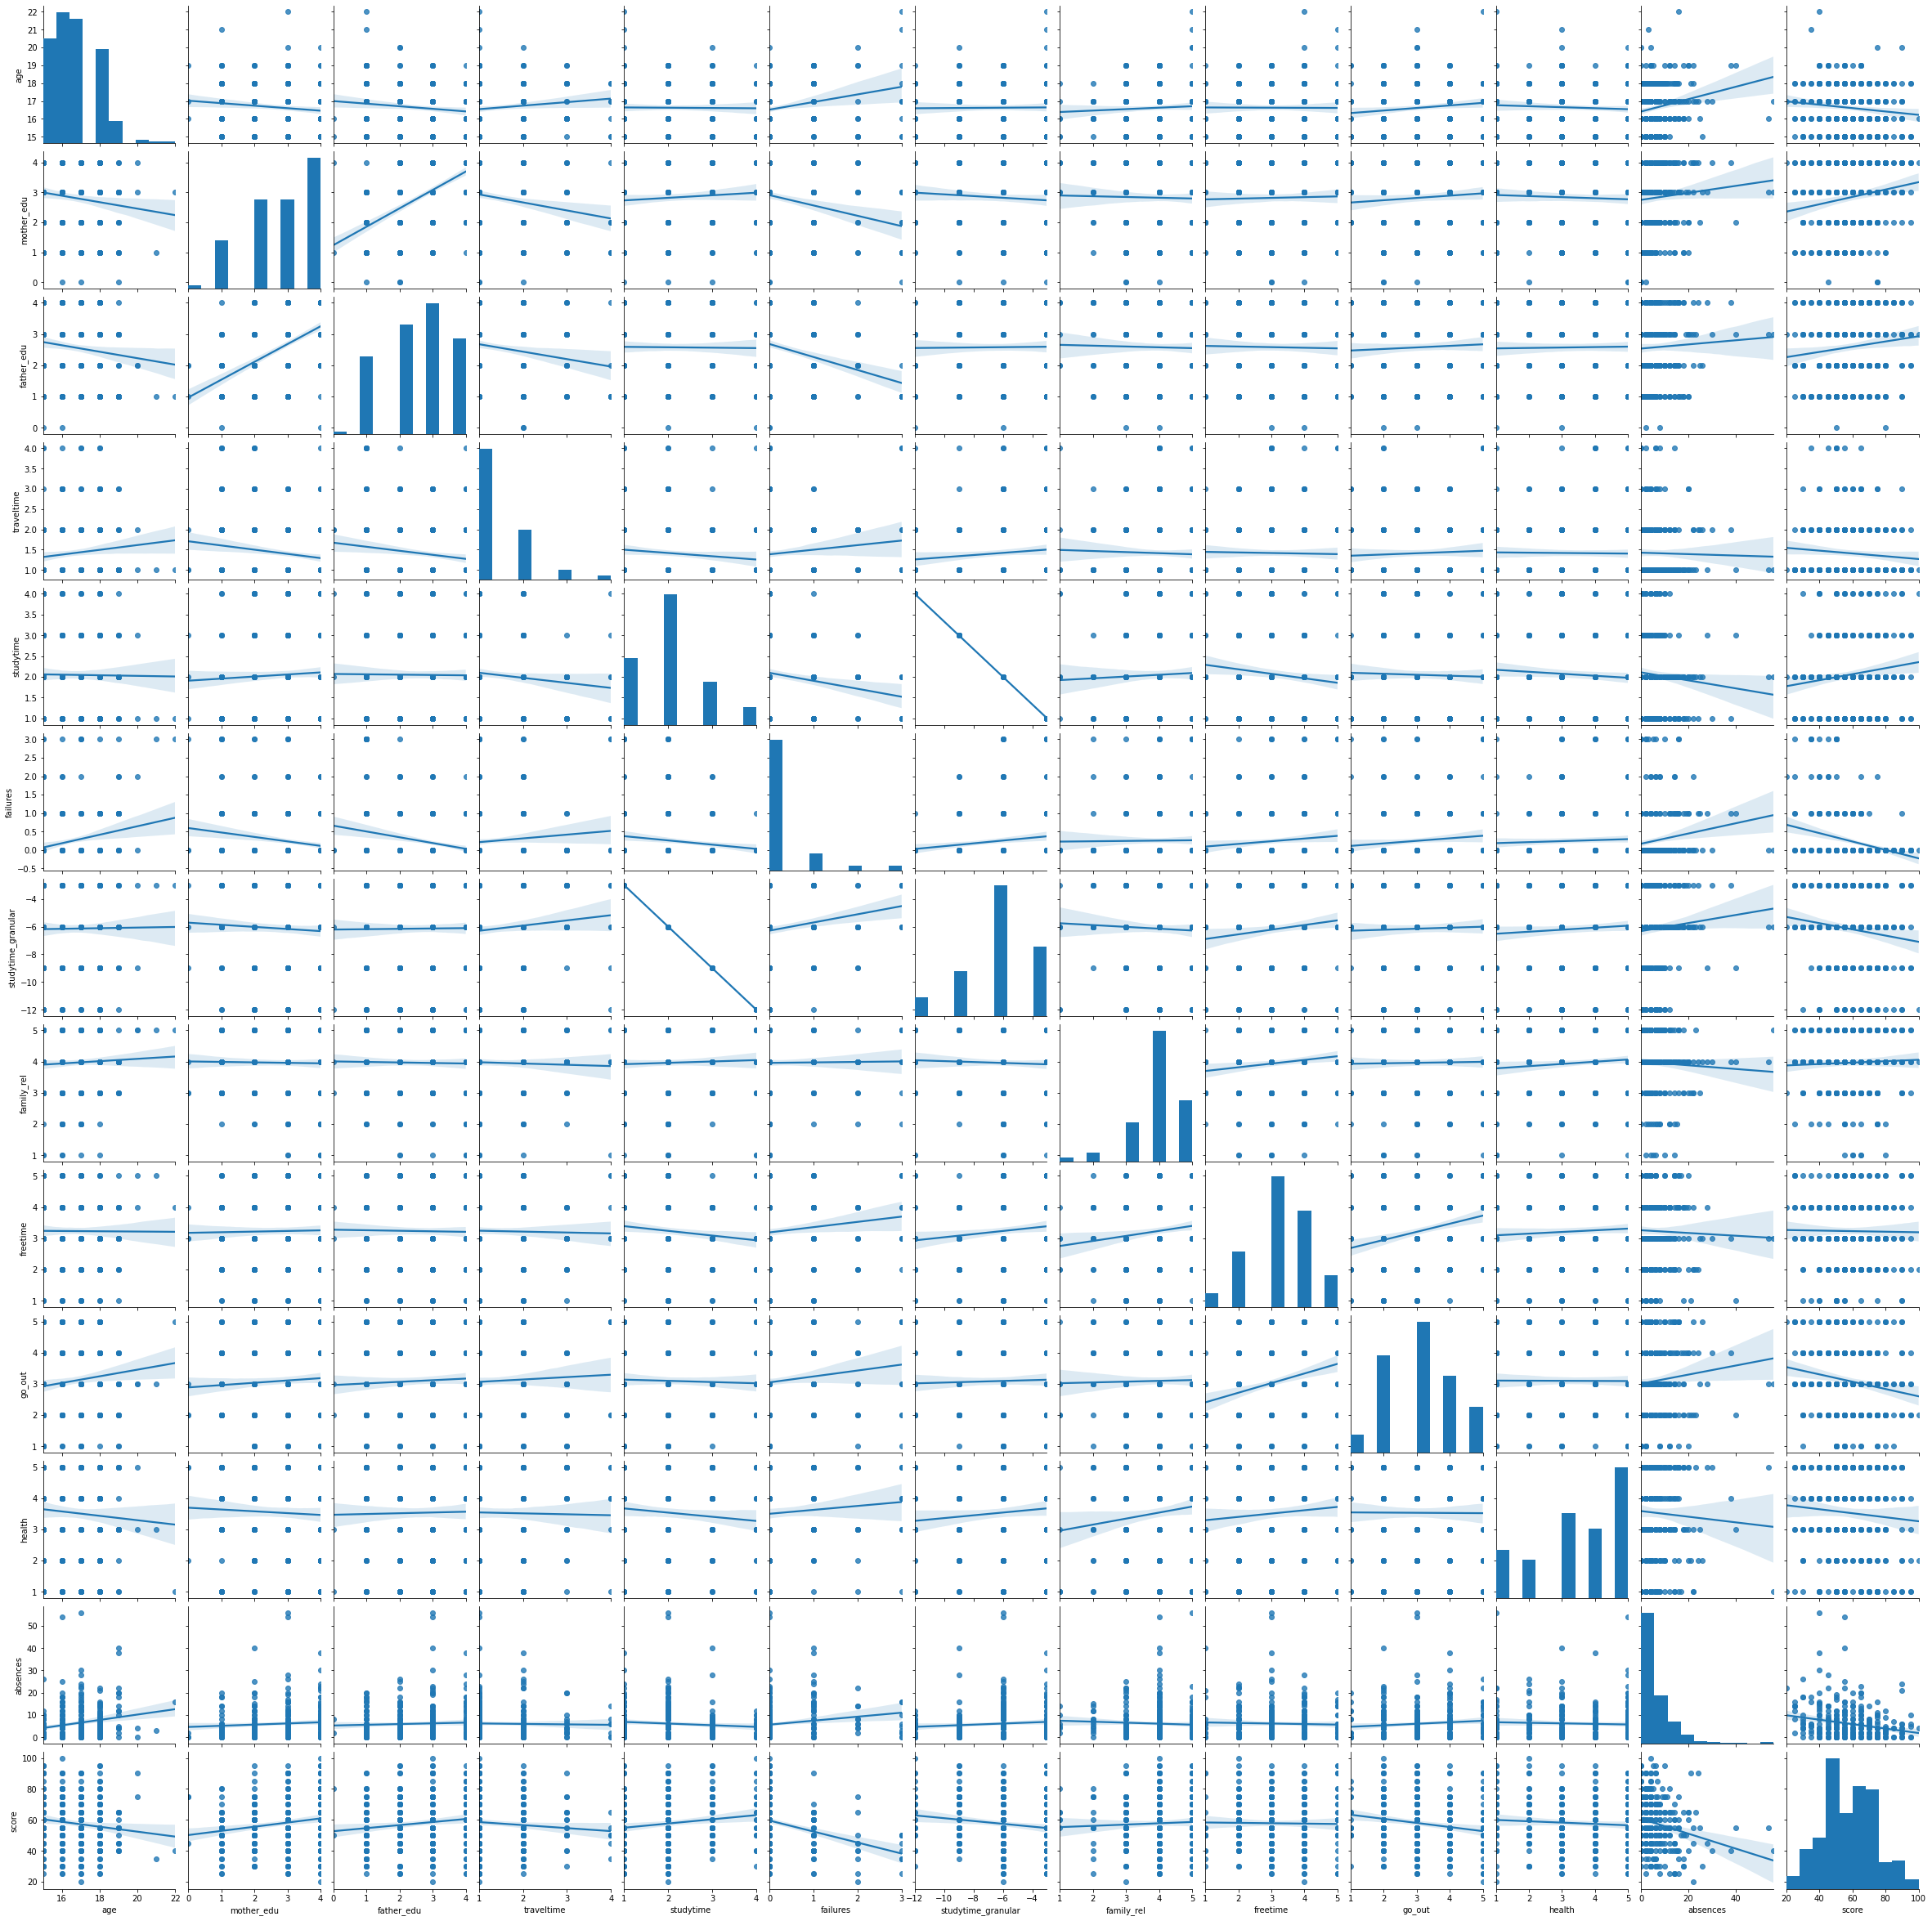

In [135]:
sns.pairplot(students, kind = 'reg')

In [136]:
students.corr()

,age,mother_edu,father_edu,traveltime,studytime,failures,studytime_granular,family_rel,freetime,go_out,health,absences,score
age,1.000000,-0.123167,-0.122404,0.108067,-0.010893,0.221949,0.011039,0.054818,-0.005531,0.123382,-0.062987,0.204407,-0.122905
mother_edu,-0.123167,1.000000,0.591553,-0.167012,0.065440,-0.204262,-0.065928,-0.019600,0.022341,0.075391,-0.045494,0.078298,0.181847
father_edu,-0.122404,0.591553,1.000000,-0.154348,-0.010475,-0.255373,0.010742,-0.020995,-0.018377,0.050684,0.018490,0.046088,0.128341
traveltime,0.108067,-0.167012,-0.154348,1.000000,-0.099354,0.107369,0.100689,-0.033015,-0.019957,0.048350,-0.014762,-0.018997,-0.082032
studytime,-0.010893,0.065440,-0.010475,-0.099354,1.000000,-0.148852,-1.000000,0.043095,-0.127996,-0.030425,-0.080161,-0.084557,0.140440
failures,0.221949,-0.204262,-0.255373,0.107369,-0.148852,1.000000,0.150597,0.011967,0.110669,0.114343,0.058502,0.157393,-0.284609
studytime_granular,0.011039,-0.065928,0.010742,0.100689,-1.000000,0.150597,1.000000,-0.043787,0.130103,0.030675,0.080834,0.084885,-0.142933
family_rel,0.054818,-0.019600,-0.020995,-0.033015,0.043095,0.011967,-0.043787,1.000000,0.138033,0.019711,0.116936,-0.051095,0.043253
freetime,-0.005531,0.022341,-0.018377,-0.019957,-0.127996,0.110669,0.130103,0.138033,1.000000,0.283022,0.075482,-0.032715,-0.014922
go_out,0.123382,0.075391,0.050684,0.048350,-0.030425,0.114343,0.030675,0.019711,0.283022,1.000000,-0.004786,0.098974,-0.176179


In [137]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (6, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column])],
               ax=ax)    
    ax.set_title('Boxplot for ' + column)
    plt.show()

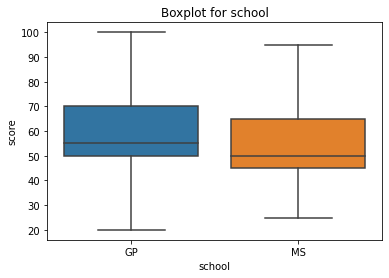

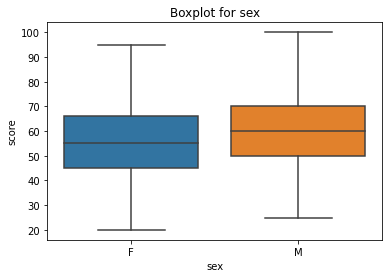

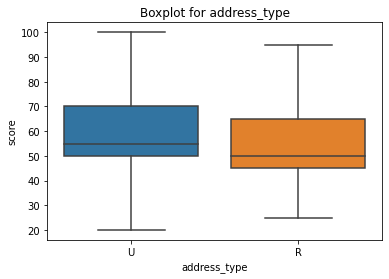

In [138]:
for col in ['school','sex','address_type']:
    get_boxplot(col)

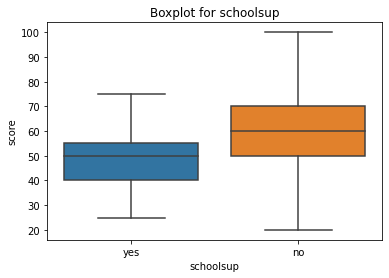

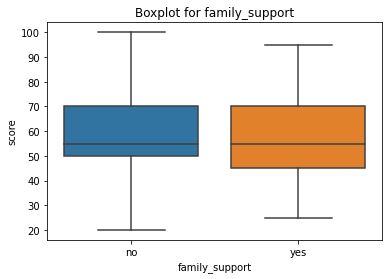

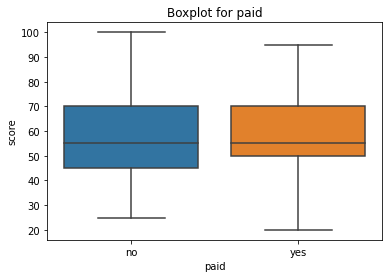

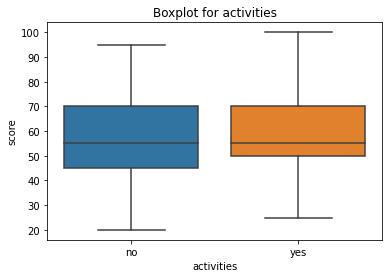

In [139]:
for col in ['schoolsup', 'family_support', 'paid', 'activities']:
    get_boxplot(col)

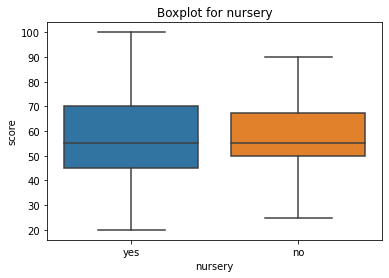

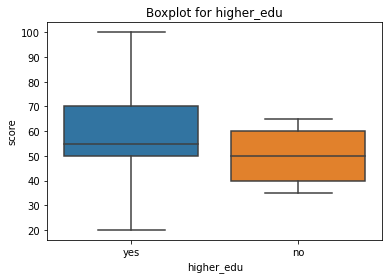

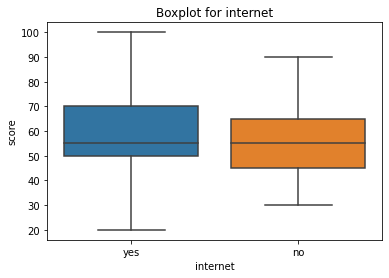

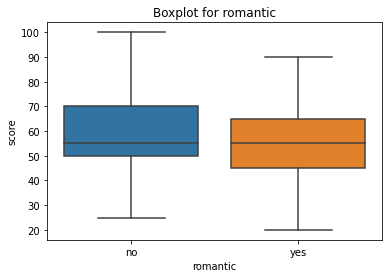

In [140]:
for col in ['nursery', 'higher_edu', 'internet', 'romantic']:
    get_boxplot(col)

In [141]:
def get_boxplot_1(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column])],
               ax=ax)    
    ax.set_title('Boxplot for ' + column)
    plt.show()

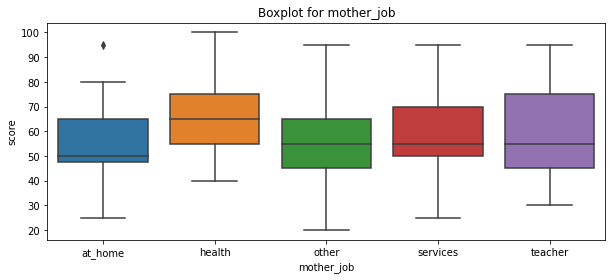

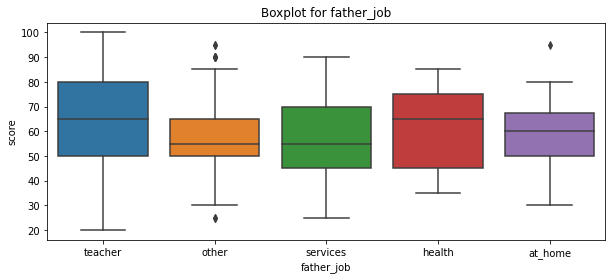

In [142]:
for col in ['mother_job', 'father_job']:
    get_boxplot_1(col)

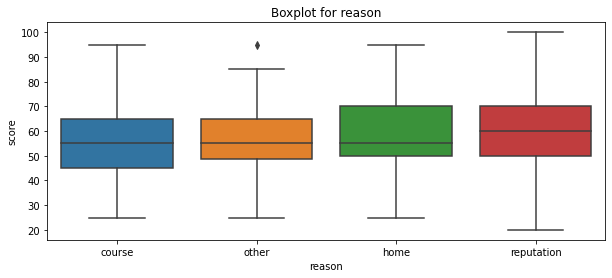

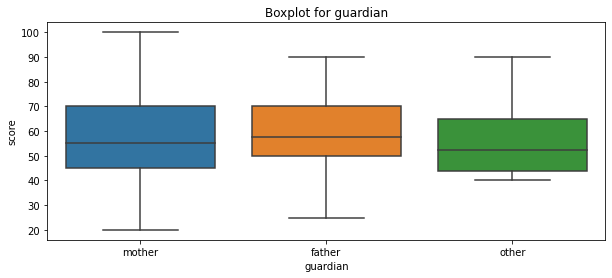

In [143]:
for col in ['reason', 'guardian']:
    get_boxplot_1(col)

In [144]:
def get_stat_dif(column):
    cols = students.loc[:, column]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [145]:
for col in ['schoolsup']:
    get_stat_dif(col)